In [1]:
import torch
from torch.autograd import grad
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

from ns_pinn import PINN

In [2]:
device = torch.device("cuda:0")

In [3]:
x = torch.linspace(0, 1, 128)
t = torch.linspace(0, 1, 100)

x_, t_ = torch.meshgrid(x, t, indexing='ij')
x_ = x_.reshape(-1, 1)
t_ = t_.reshape(-1, 1)
xt = torch.cat([x_, t_], dim=1)

In [4]:
pinn = PINN()
pinn.net.load_state_dict(torch.load('/home/gefan/FluidDiff/ckpts/pinn/burgers/Nt100_v1e-02_N200_0.pt'))
with torch.no_grad():
    u_pred1 = pinn.net(xt.to(device))
    u_pred1 = u_pred1.cpu().numpy().reshape(128, 100)

In [5]:
pinn.net.load_state_dict(torch.load('/home/gefan/FluidDiff/ckpts/pinn/burgers/Nt100_v1e-02_N200_1.pt'))
with torch.no_grad():
    u_pred2 = pinn.net(xt.to(device))
    u_pred2 = u_pred2.cpu().numpy().reshape(128, 100)

In [6]:
pinn.net.load_state_dict(torch.load('/home/gefan/FluidDiff/ckpts/pinn/burgers/Nt100_v1e-02_N200_2.pt'))
with torch.no_grad():
    u_pred3 = pinn.net(xt.to(device))
    u_pred3 = u_pred3.cpu().numpy().reshape(128, 100)

In [7]:
pinn.net.load_state_dict(torch.load('/home/gefan/FluidDiff/ckpts/pinn/burgers/Nt100_v1e-02_N200_3.pt'))
with torch.no_grad():
    u_pred4 = pinn.net(xt.to(device))
    u_pred4 = u_pred4.cpu().numpy().reshape(128, 100)

In [8]:
data = sio.loadmat('../../data/burgers_data_Nt100_v1e-02_N200_no1.mat')
u1 = data['u']
data = sio.loadmat('../../data/burgers_data_Nt100_v1e-02_N200_no2.mat')
u2 = data['u']
data = sio.loadmat('../../data/burgers_data_Nt100_v1e-02_N200_no3.mat')
u3 = data['u']
data = sio.loadmat('../../data/burgers_data_Nt100_v1e-02_N200_no4.mat')
u4 = data['u']

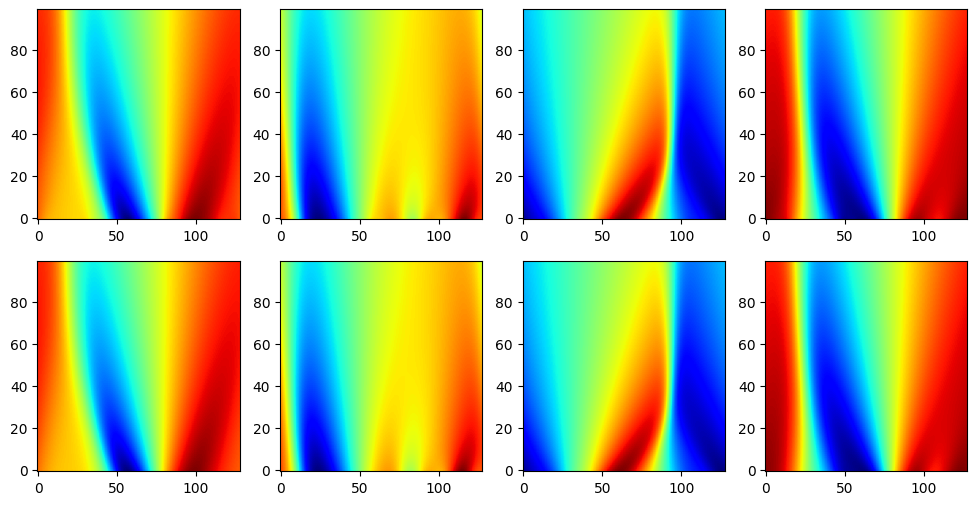

In [9]:
fig, ax = plt.subplots(2, 4, figsize=(12, 6))
ax[0, 0].imshow(u1, cmap='jet', aspect='auto', origin='lower')
ax[0, 1].imshow(u2, cmap='jet', aspect='auto', origin='lower')
ax[0, 2].imshow(u3, cmap='jet', aspect='auto', origin='lower')
ax[0, 3].imshow(u4, cmap='jet', aspect='auto', origin='lower')
ax[1, 0].imshow(u_pred1.T, cmap='jet', aspect='auto', origin='lower')
ax[1, 1].imshow(u_pred2.T, cmap='jet', aspect='auto', origin='lower')
ax[1, 2].imshow(u_pred3.T, cmap='jet', aspect='auto', origin='lower')
ax[1, 3].imshow(u_pred4.T, cmap='jet', aspect='auto', origin='lower')

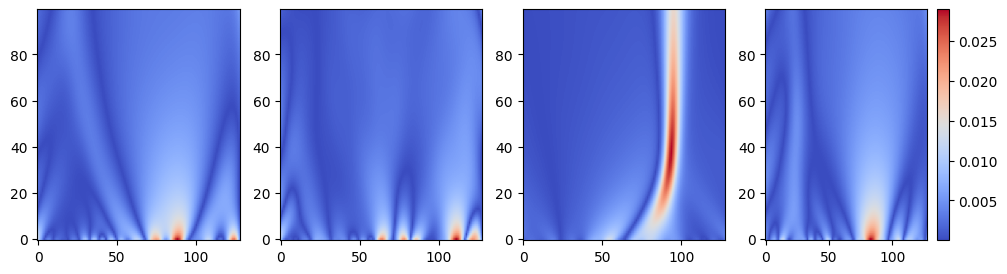

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
im = ax[0].imshow(np.abs(u1 - u_pred1.T), cmap='coolwarm', aspect='auto', origin='lower')
ax[1].imshow(np.abs(u2 - u_pred2.T), cmap='coolwarm', aspect='auto', origin='lower')
ax[2].imshow(np.abs(u3 - u_pred3.T), cmap='coolwarm', aspect='auto', origin='lower')
ax[3].imshow(np.abs(u4 - u_pred4.T), cmap='coolwarm', aspect='auto', origin='lower')
fig.colorbar(im, ax=ax[3])

In [6]:
x = torch.linspace(0, 1, 65)[:-1]
y = torch.linspace(0, 1, 65)[:-1]
t = torch.linspace(0, 20, 21)[1:]

x_, y_, t_ = torch.meshgrid(x, y, t, indexing='ij')
x_ = x_.reshape(-1, 1)
y_ = y_.reshape(-1, 1)
t_ = t_.reshape(-1, 1)
xt = torch.cat([x_, y_, t_], dim=1)



In [7]:
pinn = PINN()
pinn.net.load_state_dict(torch.load('/home/gefan/FluidDiff/ckpts/pinn/ns/T20_v1e-3_N200_0.pt'))
xyt = xyt.to(device)
xyt.requires_grad = True
psi = pinn.net(xyt)
psi_xyt = grad(psi.sum(), xyt, create_graph=True)[0]
psi_x = psi_xyt[:, 0:1]
psi_y = psi_xyt[:, 1:2]
psi_xx = grad(psi_x.sum(), xyt, create_graph=True)[0][:, 0:1]
psi_yy = grad(psi_y.sum(), xyt, create_graph=True)[0][:, 1:2]
w_pred = -(psi_xx + psi_yy)
w_pred = w_pred.detach().cpu().numpy().reshape(64, 64, 20)

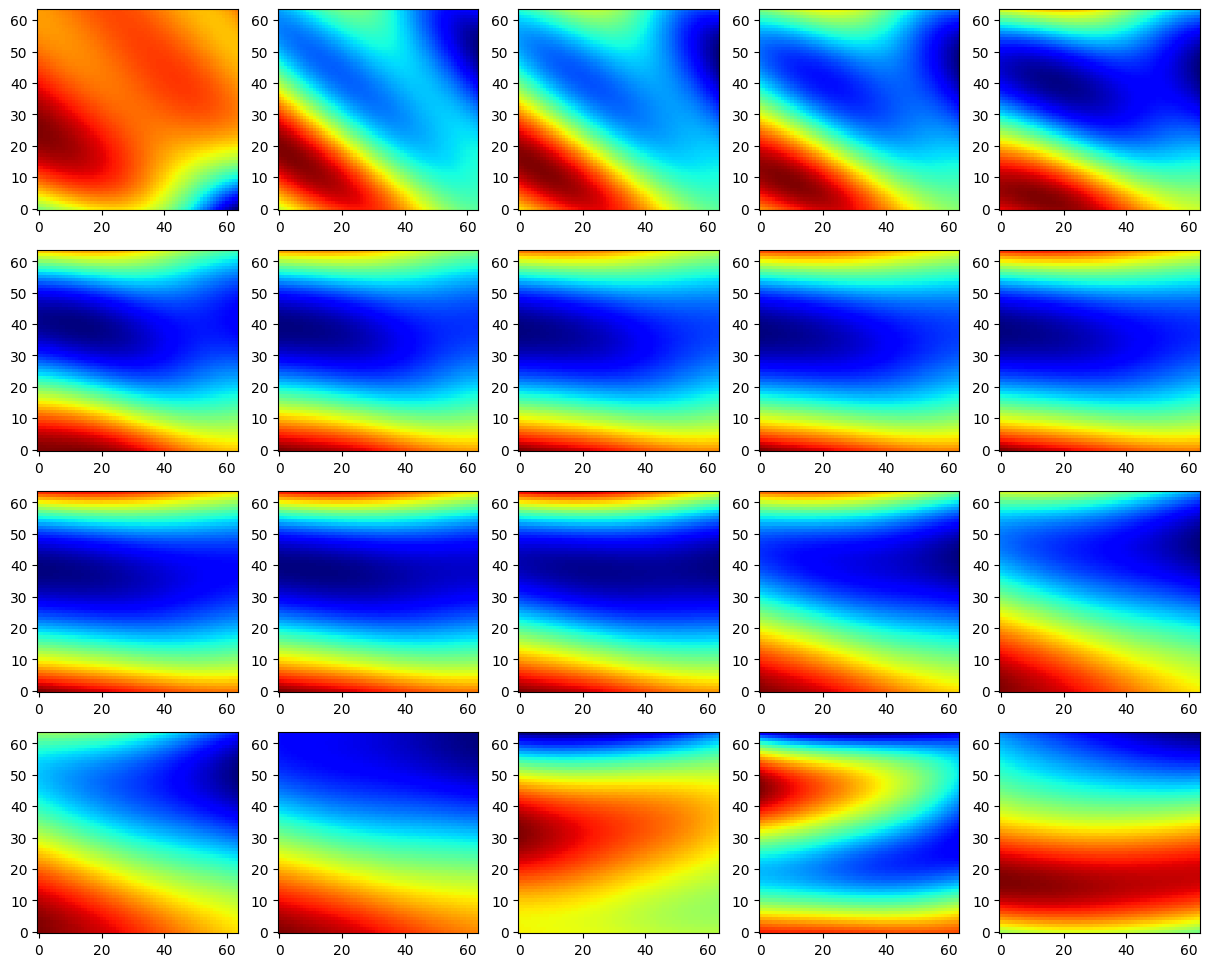

: 

In [9]:
fig, ax = plt.subplots(4, 5, figsize=(15, 12))
ax = ax.flatten()
for i in range(20):
    ax[i].imshow(w_pred[:, :, i].T, cmap='jet', aspect='auto', origin='lower')